In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

features = ["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"] 

# Change these to local file if available
train_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
test_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'
original_train = pd.read_csv(train_url, names=features, sep=r'\s*,\s*', 
                             engine='python', na_values="?", skipinitialspace=True)
# This will download 1.9M
original_test = pd.read_csv(test_url, names=features, sep=r'\s*,\s*', 
                            engine='python', na_values="?", skiprows=1, skipinitialspace=True)

original_train

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [2]:
original_test

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [3]:
original_train.isnull().sum()

Age                  0
Workclass         1836
fnlwgt               0
Education            0
Education-Num        0
Martial Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital Gain         0
Capital Loss         0
Hours per week       0
Country            583
Target               0
dtype: int64

In [4]:
original_test.isnull().sum()

Age                 0
Workclass         963
fnlwgt              0
Education           0
Education-Num       0
Martial Status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Capital Gain        0
Capital Loss        0
Hours per week      0
Country           274
Target              0
dtype: int64

Text(0.5, 1.0, 'Race')

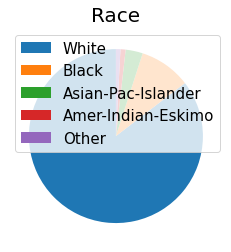

In [5]:
%matplotlib inline

counts = original_train['Race'].value_counts()
labels = counts.index

#Plot pie chart
plt.pie(counts, startangle=90)
plt.legend(labels, loc=2,fontsize=15)
plt.title("Race",size=20)


Text(0.5, 1.0, 'Gender')

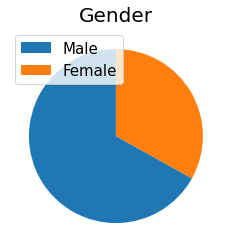

In [6]:
%matplotlib inline

counts = original_train['Sex'].value_counts()
labels = counts.index

#Plot pie chart
plt.pie(counts, startangle=90)
plt.legend(labels, loc=2,fontsize=15)
plt.title("Gender",size=20)


In [7]:
original = pd.concat([original_train, original_test])
labels= original['Target']

labels_train = original_train['Target']

labels_test = original_test['Target']
labels = labels.replace('<=50K', 0).replace('>50K', 1)
labels = labels.replace('<=50K.', 0).replace('>50K.', 1)

labels_train = labels_train.replace('<=50K', 0).replace('>50K', 1)
labels_test = labels_test.replace('<=50K.', 0).replace('>50K.', 1)
original_train['Income'] = labels_train
original_test['Income'] = labels_test
original_train
original['Income'] = labels

men_with_high_income = len(original[(original['Sex']=='Male') & (original['Income']==1)])
men_with_low_income = len(original[(original['Sex']=='Male') & (original['Income']==0)])
print(men_with_high_income)
data_size_men  = len(original[(original['Sex']=='Male')])
data_size_women  = len(original[(original['Sex']=='Female')])
percentage_men = men_with_high_income/data_size_men
percentage_men_low = men_with_low_income/data_size_men
women_with_high_income = len(original[(original['Sex']=='Female') & (original['Income']==1)])
women_with_low_income = len(original[(original['Sex']=='Female') & (original['Income']==0)])

percentage_women = women_with_high_income/data_size_women 

percentage_women_low = women_with_low_income/data_size_women 
arr_m = [men_with_high_income, percentage_men]

arr_w = [women_with_high_income, percentage_women]
results = pd.DataFrame({'Male':arr_m, 'Female':arr_w})
arr = pd.Series(["Total >50K", "Probability/Ratio"])
results = results.set_index(arr)
results


9918


,Male,Female
Total >50K,9918.000000,1769.000000
Probability/Ratio,0.303767,0.109251


In [8]:
    adult_details = {'Adult Gender Differences': {'Male': {'Count': data_size_men,
                                         'Total =<50K': men_with_low_income,
                                         'Class probability of low income': percentage_men_low ,              
                                         'Total > 50K': men_with_high_income,
                                             'Class probability of high income': percentage_men,                
                                                          },
                               'Female': {'Count': data_size_women,
                                         'Total =<50K': women_with_low_income,
                                         'Class probability of low income': percentage_women_low ,              
                                         'Total > 50K': women_with_high_income,
                                         'Class probability of high income': percentage_women                 
                                                          }}}


    df=pd.DataFrame(adult_details['Adult Gender Differences'])
    df

,Male,Female
Count,32650.000000,16192.000000
Total =<50K,22732.000000,14423.000000
Class probability of low income,0.696233,0.890749
Total > 50K,9918.000000,1769.000000
Class probability of high income,0.303767,0.109251


In [10]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix

lr = linear_model.LogisticRegression()
def trainAndTestLR(data, Y, c, iterator):
    y = Y
    X = data
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.4, random_state=0, shuffle=True)

    lr.C = c
    lr.max_iter = iterator

    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    train_pred = lr.predict(X_train)
    test_pred = lr.predict(X_test)

    # passing actual and predicted values
    cm = confusion_matrix(y_test, test_pred)

    # true Write data values in each cell of the matrix
    sns.heatmap(cm, annot=True)
    plt.savefig('confusionLR.png')


    return accuracy_score(y_pred, y_test)

0.8009929876644316


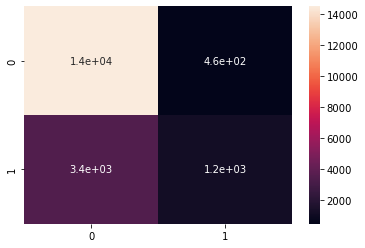

In [11]:
data = pd.concat([original_train, original_test], axis=0)

data = pd.get_dummies(
    data,
    prefix=None,
    prefix_sep='_',
    dummy_na=False,
    columns=['Workclass','Education','Martial Status','Occupation','Relationship','Race','Country'],
    sparse=False,
    drop_first=False,
    dtype=None
    )
data['Sex'] = data['Sex'].replace('Female', 0).replace('Male', 1)
data['Target'] = data['Target'].replace('<=50K', 0).replace('>50K', 1)
data['Target'] = data['Target'].replace('<=50K.', 0).replace('>50K.', 1)
#parameter LR

C = [ 1]
numIter = [100]

Y = data['Target'].values

train = data.drop(['Target'], axis=1).values

for it in numIter:
    for c in C:
        tmpResLR = trainAndTestLR(train, Y, c, it)
        print(tmpResLR)
        

In [41]:
num_train = len(original_train)
full_data = pd.concat([original_train, original_test])

In [45]:
full_data.shape

(48842, 16)

In [46]:
tf_data = pd.get_dummies(
    full_data,
    prefix=None,
    prefix_sep='_',
    dummy_na=False,
    columns=['Workclass','Education','Martial Status','Occupation','Relationship','Race','Country'],
    sparse=False,
    drop_first=False,
    dtype=None
    )
tf_data['Sex'] = tf_data['Sex'].replace('Female', 0).replace('Male', 1)
tf_data['Target'] = tf_data['Target'].replace('<=50K', 0).replace('>50K', 1)
tf_data['Target'] = tf_data['Target'].replace('<=50K.', 0).replace('>50K.', 1)

In [47]:
tf_data.shape

(48842, 106)

In [49]:
train_data = tf_data[:num_train]
test_data = tf_data[num_train:]

In [53]:
train_data.head()

,Age,fnlwgt,Education-Num,Sex,Capital Gain,Capital Loss,Hours per week,Target,Income,Workclass_Federal-gov,...,Country_Portugal,Country_Puerto-Rico,Country_Scotland,Country_South,Country_Taiwan,Country_Thailand,Country_Trinadad&Tobago,Country_United-States,Country_Vietnam,Country_Yugoslavia
0,39,77516,13,1,2174,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,1,0,0,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
y_train_2 = train_data['Target'].values

X_train_2 = train_data.drop(['Target','Income'], axis=1).values

In [58]:
X_train_2.shape

(32561, 104)

In [59]:
y_test_2 = test_data['Target'].values

X_test_2 = test_data.drop(['Target','Income'], axis=1).values

In [75]:
y_test_2.shape

(16281,)

In [61]:
lr_2 = linear_model.LogisticRegression()

lr_2.fit(X_train_2, y_train_2)

LogisticRegression()

In [62]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_2, X_train_2, y_train_2, cv=10)
print('Cross-Validation Accuracy Scores', scores)

/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/fayyaanyatasia/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

Cross-Validation Accuracy Scores [0.79521032 0.7985258  0.79361179 0.79668305 0.79453317 0.80773956
 0.79084767 0.8009828  0.79699017 0.80313268]


In [63]:
prediction = lr_2.predict(X_test_2)

In [66]:
prediction.shape

(16281,)

In [67]:
original_test.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.,1
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.,0


In [76]:
aquitas_df = original_test.copy()

# drop target
aquitas_df.drop('Target', axis=1, inplace=True)

# rename income to label_value
aquitas_df.rename(columns = {'Income':'label_value'}, inplace = True)

# append the pred with column score
aquitas_df['score'] = prediction

In [80]:
aquitas_df.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,label_value,score
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1,1
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0,0


In [81]:
# save to csv
aquitas_df.to_csv('adult_aquitas.csv')